In [2]:
# 21.1 住宅価格のプロット
def plotHousing(impression):
    """impression 'flat', 'volatile', 'fair'
    のいずれかの値をとる文字列と仮定する.
    時間の経過に伴う住宅価格の棒グラフを生成する"""
    f = open("midWestHousingPrices.txt", 'r')
    # ファイルの各行は、アメリカ合衆国中西部の4半期ごとの価格を表す
    labels,prices = ([],[])
    for line in f:
        year, quarter, price = line.split()
        label = year[2:4] + '\n Q' + quarter[1]
        labels.append(label)
        prices.append(float(price)/1000)
    quarters = pylab.arange(len(labels)) #棒グラフのx座標
    width = 0.8 # 棒グラフの幅
    pylab.bar(quarters, prices, width)
    pylab.xticks(quarters+width/2, labels)
    pylab.title('Housing Prices in U.S. Midwest')
    pylab.xlabel('Quarter')
    pylab.ylabel('Average Price ($1000\'s)')
    if impression == 'float':
        pylab.ylim(10, 500)
    elif impression == 'volatile':
        pylab.ylim(180, 220)
    elif impression == 'fair':
        pylab.ylim(150,250)
    else:
        raise ValueError

# plotHousing('flat')
# pylab.figure()
# plotHousing('volatile')    

In [3]:
# 21.2
import random

def juneProb(numTrials):
    june48 = 0
    for trial in range(numTrials):
        june = 0
        for i in range(446):
            if random.randint(1, 12) == 6:
                june += 1
        if june >= 48:
            june48 += 1
    jProb = round(june48/numTrials,4)
    print('Probability of at least 48 births in June =', jProb)

In [4]:
juneProb(10000)

Probability of at least 48 births in June = 0.0435


In [7]:
def anyProb(numTrials):
    anyMonth48 = 0
    for trial in range(numTrials):
        months = [0]*12
        for i in range(446):
             months[random.randint(0,11)] += 1
        if max(months) >= 48:
            anyMonth48 += 1
    aProb = round(anyMonth48/numTrials,4)
    print('Probability of at least 48 births in some month =', aProb)

In [8]:
anyProb(10000)

Probability of at least 48 births in some month = 0.436


In [9]:
# 22.4
def minkowskiDist(v1, v2, p):
    """ v1とv2は長さの等しい数値配列であるとする
        v1とv2の、p次のミンコウスキ距離を返す。
        p = 1: マンハッタン距離
        p = 2: ユークリッド距離"""
    dist = 0.0
    for i in range(len(v1)):
        dist += abs(v1[i]-v2[i])**p
    return dist**(1/p)

In [10]:
import pylab

class Animal(object):
    def __init__(self,name,features):
        """name: string
           features: 数値のリスト"""
        self.name = name
        self.features = pylab.array(features) # ndarrayに変換

    def getName(self):
        return self.name
    
    def getFeatures(self):
        return self.features
    
    def distance(self, other):
        """other: Animalオブジェクトとする.
           自身とother間のユークリッド距離を返す"""
        return minkowskiDist(self.getFeatures(), other.getFeatures(), 2)

In [17]:
def compareAnimals(animals, precision):
    """animals: Animalオブジェクトのリスト
       precision: 非負の整数(有効桁数)
       それぞれAnimal間のユークリッド距離の表を作成する"""
    # 行と列ラベルを取得
    columnLabels = []
    for a in animals:
        columnLabels.append(a.getName())
    rowLabels = columnLabels[:] # リストコピー
    tableVals=[]
    # Animal間の距離を得る
    # それぞれの行について
    for a1 in animals:
        row = []
        # それぞれの列について
        for a2 in animals:
            if a1 == a2:
                row.append('--')
            else:
                distance = a1.distance(a2)
                row.append(str(round(distance,precision)))
        tableVals.append(row)
    # 表を作成する
    table = pylab.table(rowLabels=rowLabels, colLabels = columnLabels,
                        cellText=tableVals,
                        cellLoc='center',
                        colWidths=[0.2]*len(animals), loc='top')
    table.scale(1,2.5)
    pylab.savefig('distances')

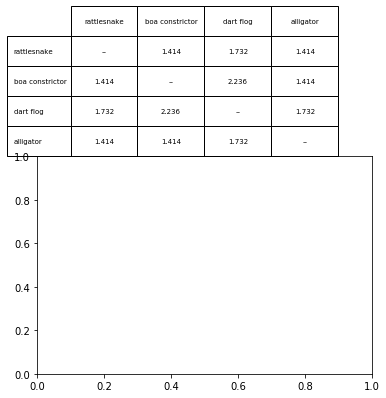

In [20]:
rattlesnake = Animal('rattlesnake', [1,1,1,1,0])
boa = Animal('boa constrictor', [0,1,0,1,0])
dartFrog = Animal('dart flog', [1,0,1,0,1])
animals = [rattlesnake, boa, dartFrog]
alligator = Animal('alligator', [1,1,0,1,1])
animals.append(alligator)
compareAnimals(animals, 3)